In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yaml
from pathlib import Path
from yaml.loader import SafeLoader


sns.set_style("darkgrid")


dir_path = Path("outputs/2023-01-17/08-11-05")

# Recover teh config used in the trading strategy.
cfg_path = dir_path.joinpath(".hydra/config.yaml")
with open(cfg_path) as f:
    cfg = yaml.load(f, Loader=SafeLoader)

# Input to the trading strategy - used to recover the date.
input_data_path = dir_path.joinpath("data")

input_df0 = pd.read_csv(input_data_path.joinpath("df0.csv"))
input_df0 = input_df0[["datetime", "Close"]].rename(columns={"Close": "S0"})
input_df0["S0_round"] = input_df0["S0"].round(2)

input_df1 = pd.read_csv(input_data_path.joinpath("df1.csv"))
input_df1 = input_df1[["datetime", "Close"]].rename(columns={"Close": "S1"})
input_df1["S1_round"] = input_df1["S1"].round(2)

input_df = pd.merge(input_df0, input_df1, how="left", left_on=["datetime"], right_on=["datetime"])

# Output of the trading strategy.
output_data_path = dir_path.joinpath("plot_data.csv")
output_df = pd.read_csv(output_data_path)
output_df.drop(columns=["Unnamed: 0"])

# Backtrader has a bug in hourly time reporting.
input_df["date"] = pd.to_datetime(input_df["datetime"]).dt.date
output_df["date"] = pd.to_datetime(output_df["datetime_bt"]).dt.date

# Combine input datetime information and output data.
rsuffix = "_rsuffix"
df = pd.merge(input_df, output_df, how="left", left_on=["date", "S0_round", "S1_round"], right_on=["date", "S0", "S1"], suffixes=("", rsuffix))

drop_cols = list(df.filter(regex=f"{rsuffix}|_round|Unnamed: 0"))  # + ["date"]
df.drop(columns=drop_cols, inplace=True)

# Assert we did not lose information.
# assert len(df) == len(input_df) == len(output_df)

df.tail()

,datetime,S0,S1,date,datetime_bt,spread,spread_zscore,long,short,exit_long,...,is_short,theta,train,S0_price,S0_size,S1_price,S1_size,cash,spread_mean,spread_std
8869,2023-01-16 16:00:00,78.870003,3.650,2023-01-16,2023-01-16 23:59:59.999989,0.781144,-0.238067,NaN,NaN,NaN,...,False,NaN,NaN,0.0,0.0,0.0,0.0,978.046591,0.793378,0.051388
8870,2023-01-16 17:00:00,79.029999,3.635,2023-01-16,2023-01-16 23:59:59.999989,0.782989,-0.201478,NaN,NaN,NaN,...,False,NaN,NaN,0.0,0.0,0.0,0.0,978.046591,0.793338,0.051361
8871,2023-01-16 18:00:00,78.879997,3.610,2023-01-16,2023-01-16 23:59:59.999989,0.781628,-0.227306,NaN,NaN,NaN,...,False,NaN,NaN,0.0,0.0,0.0,0.0,978.046591,0.793297,0.051335
8872,2023-01-16 19:00:00,78.860001,3.625,2023-01-16,2023-01-16 23:59:59.999989,0.781326,-0.232515,NaN,NaN,NaN,...,False,NaN,NaN,0.0,0.0,0.0,0.0,978.046591,0.793256,0.051310
8873,2023-01-16 23:00:00,78.779999,3.680,2023-01-16,2023-01-16 23:59:59.999989,0.779928,-0.259170,NaN,NaN,NaN,...,False,NaN,NaN,0.0,0.0,0.0,0.0,978.046591,0.793221,0.051293


In [44]:
input_df0 = pd.read_csv(input_data_path.joinpath("df0.csv"))
input_df1 = pd.read_csv(input_data_path.joinpath("df1.csv"))

output_data_path = dir_path.joinpath("plot_data.csv")
output_df2 = pd.read_csv(output_data_path)

output_df2["datetime"] = input_df0["datetime"]
output_df2.tail()

,Unnamed: 0,datetime_bt,S0,S1,spread,spread_zscore,long,short,exit_long,exit_short,...,theta,train,S0_price,S0_size,S1_price,S1_size,cash,spread_mean,spread_std,datetime
8795,8795,2023-01-16 23:59:59.999989,78.87,3.65,0.781144,-0.238067,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,978.046591,0.793378,0.051388,2023-01-16 16:00:00
8796,8796,2023-01-16 23:59:59.999989,79.03,3.63,0.782989,-0.201478,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,978.046591,0.793338,0.051361,2023-01-16 17:00:00
8797,8797,2023-01-16 23:59:59.999989,78.88,3.61,0.781628,-0.227306,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,978.046591,0.793297,0.051335,2023-01-16 18:00:00
8798,8798,2023-01-16 23:59:59.999989,78.86,3.62,0.781326,-0.232515,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,978.046591,0.793256,0.051310,2023-01-16 19:00:00
8799,8799,2023-01-16 23:59:59.999989,78.78,3.68,0.779928,-0.259170,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,978.046591,0.793221,0.051293,2023-01-16 23:00:00


In [51]:
set(output_df2.index.tolist()).diff(set(df.index.tolist()))

AttributeError: 'set' object has no attribute 'diff'

In [20]:
# Forward fill theta for entries between retraining periods.
df["theta"].fillna(method="ffill", inplace=True)

# Drop the rows of all NaNs, keep individual (row,col) NaN entries.
df.dropna(axis=0, how="all", inplace=True)

df.tail()

,datetime,S0_x,S0_round,S1_x,S1_round,date,Unnamed: 0,datetime_bt,S0_y,S1_y,...,is_short,theta,train,S0_price,S0_size,S1_price,S1_size,cash,spread_mean,spread_std
8869,2023-01-16 16:00:00,78.870003,78.87,3.650,3.65,2023-01-16,8795.0,2023-01-16 23:59:59.999989,78.87,3.65,...,False,0.781755,NaN,0.0,0.0,0.0,0.0,978.046591,0.793378,0.051388
8870,2023-01-16 17:00:00,79.029999,79.03,3.635,3.63,2023-01-16,8796.0,2023-01-16 23:59:59.999989,79.03,3.63,...,False,0.781755,NaN,0.0,0.0,0.0,0.0,978.046591,0.793338,0.051361
8871,2023-01-16 18:00:00,78.879997,78.88,3.610,3.61,2023-01-16,8797.0,2023-01-16 23:59:59.999989,78.88,3.61,...,False,0.781755,NaN,0.0,0.0,0.0,0.0,978.046591,0.793297,0.051335
8872,2023-01-16 19:00:00,78.860001,78.86,3.625,3.62,2023-01-16,8798.0,2023-01-16 23:59:59.999989,78.86,3.62,...,False,0.781755,NaN,0.0,0.0,0.0,0.0,978.046591,0.793256,0.051310
8873,2023-01-16 23:00:00,78.779999,78.78,3.680,3.68,2023-01-16,8799.0,2023-01-16 23:59:59.999989,78.78,3.68,...,False,0.781755,NaN,0.0,0.0,0.0,0.0,978.046591,0.793221,0.051293


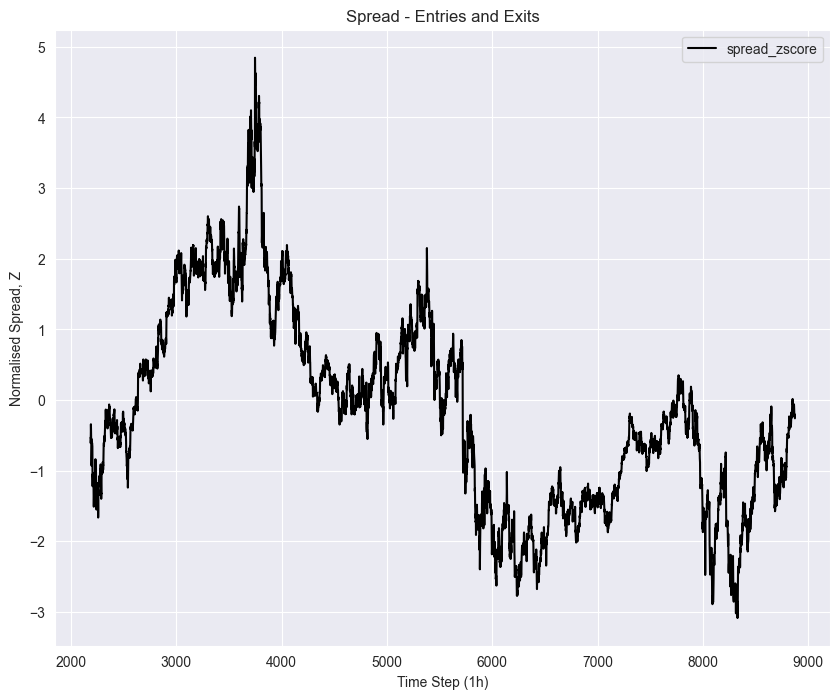

In [21]:
# Record when training occurred.
train_periods = df[df["train"]== 1]["train"].index.tolist()

# Unpack config.
interval = cfg["data"]["interval"]
z_entry = cfg["pairs"]["z_entry"]
z_exit = cfg["pairs"]["z_exit"]

# Plot portfolio z-score and trade signals.
fig = plt.figure()
fig.set_size_inches(10, 8)
plt.plot(df["spread_zscore"], color="black", label="spread_zscore")

plt.title("Spread - Entries and Exits")
plt.xlabel(f"Time Step ({interval})")
plt.ylabel("Normalised Spread, Z")
plt.legend()
plt.savefig("spread_entries_exits.png")
plt.show()

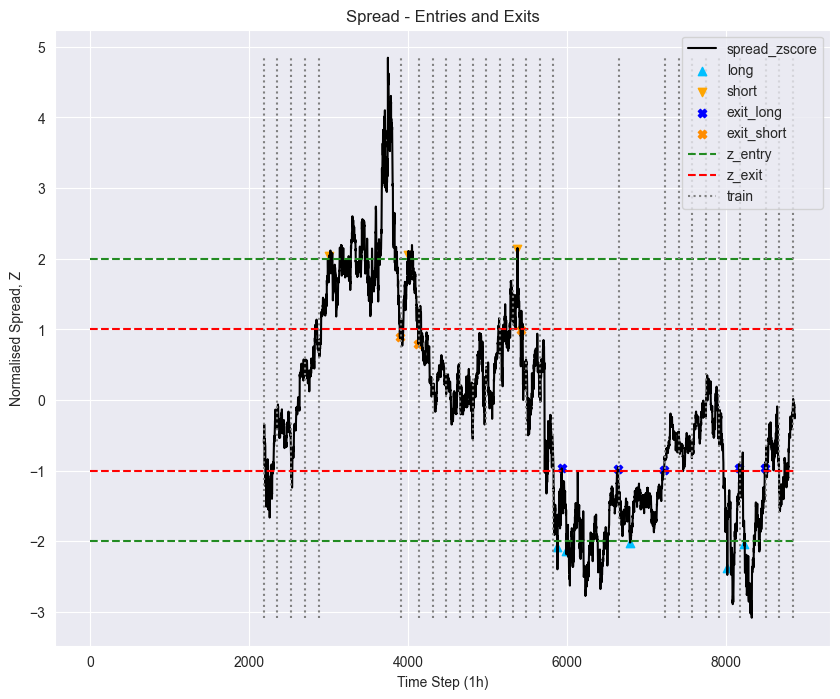

In [22]:
# Record when training occurred.
train_periods = df[df["train"]== 1]["train"].index.tolist()

# Unpack config.
interval = cfg["data"]["interval"]
z_entry = cfg["pairs"]["z_entry"]
z_exit = cfg["pairs"]["z_exit"]

# Plot portfolio z-score and trade signals.
fig = plt.figure()
fig.set_size_inches(10, 8)
plt.plot(df["spread_zscore"], color="black", label="spread_zscore")
plt.scatter(df.index, df["long"], color="deepskyblue", marker="^", label="long")
plt.scatter(df.index, df["short"], color="orange", marker="v", label="short")
plt.scatter(df.index, df["exit_long"], color="blue", marker="X", label="exit_long")
plt.scatter(df.index, df["exit_short"], color="darkorange", marker="X", label="exit_short")
xmin = df.index[0]
xmax = df.index[-1]

# Trade entry and exit thresholds.
plt.hlines([-z_entry, z_entry], xmin=xmin, xmax=xmax, color="forestgreen", linestyle="dashed", label="z_entry")
plt.hlines([-z_exit, z_exit], xmin=xmin, xmax=xmax, color="red", linestyle="dashed", label="z_exit")

# Record when training occurred.
plt.vlines(train_periods, ymin=np.min(df["spread_zscore"]), ymax=np.max(df["spread_zscore"]), color="grey", linestyle="dotted", label="train")

plt.title("Spread - Entries and Exits")
plt.xlabel(f"Time Step ({interval})")
plt.ylabel("Normalised Spread, Z")
plt.legend()
plt.savefig("spread_entries_exits.png")
plt.show()

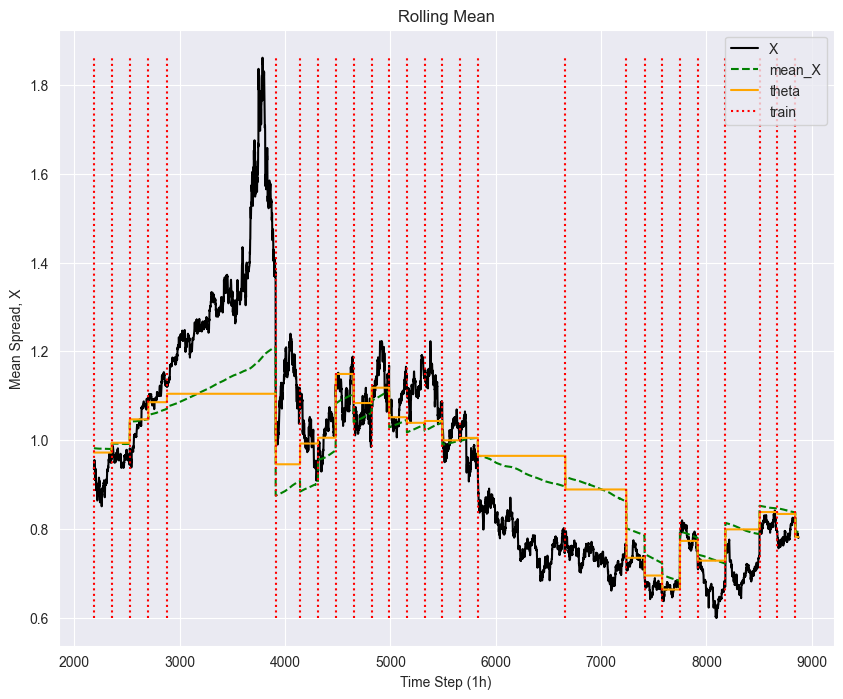

In [23]:
# Plot portfolio spread vs. long run means.
fig = plt.figure()
fig.set_size_inches(10, 8)
plt.plot(df["spread"], color="black", label="X")
plt.plot(df["spread_mean"], color="green", linestyle="dashed", label="mean_X")

# OU long-run mean
plt.plot(df["theta"], color="orange", label="theta")

# Record when training occurred.
plt.vlines(train_periods, ymin=np.min(df["spread"]), ymax=np.max(df["spread"]), color="red", linestyle="dotted", label="train")

plt.title("Rolling Mean")
plt.xlabel(f"Time Step ({interval})")
plt.ylabel("Mean Spread, X")
plt.legend()
# plt.savefig("spread_mean.png")
plt.show()

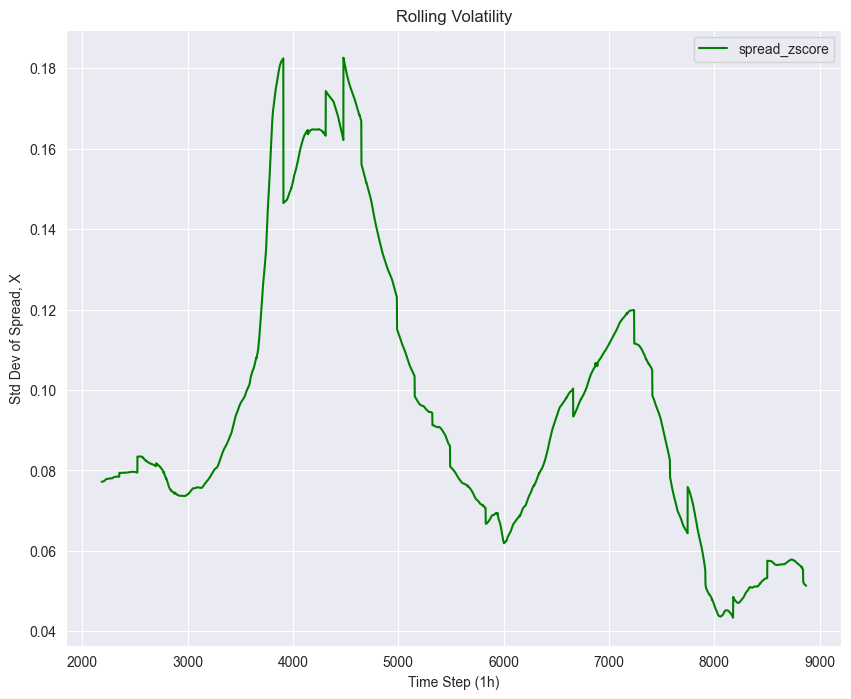

In [24]:
fig = plt.figure()
fig.set_size_inches(10, 8)
plt.plot(df["spread_std"], color="green", label="spread_zscore")
plt.title("Rolling Volatility")
plt.xlabel(f"Time Step ({interval})")
plt.ylabel("Std Dev of Spread, X")
plt.legend()
# plt.savefig("spread_stddev.png")
plt.show()

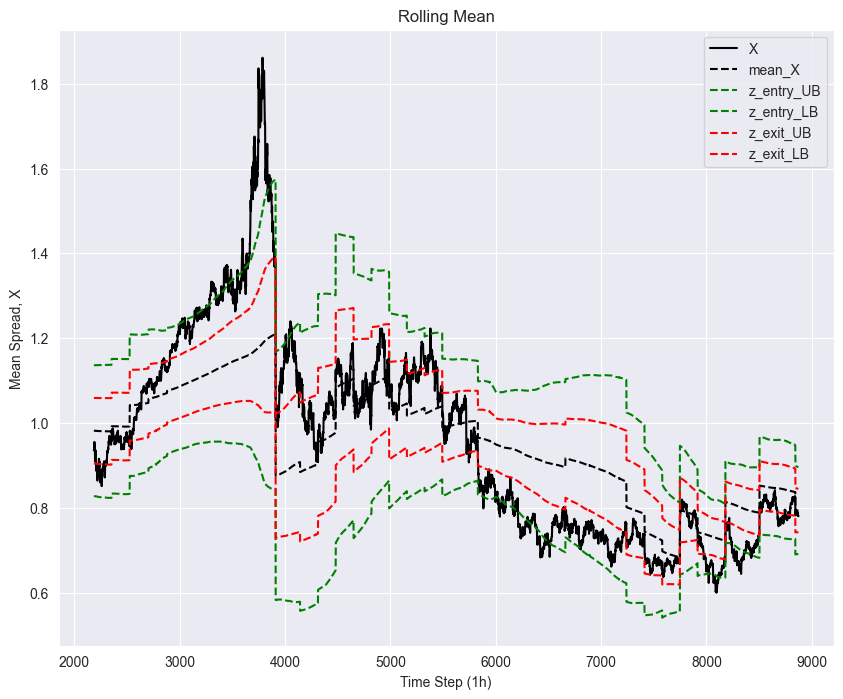

In [25]:
fig = plt.figure()
fig.set_size_inches(10, 8)
plt.plot(df["spread"], color="black", label="X")
plt.plot(df["spread_mean"], color="black", linestyle="dashed", label="mean_X")
plt.plot(df["spread_mean"] + z_entry*df["spread_std"], color="green", linestyle="dashed", label="z_entry_UB")
plt.plot(df["spread_mean"] - z_entry*df["spread_std"], color="green", linestyle="dashed", label="z_entry_LB")
plt.plot(df["spread_mean"] + z_exit*df["spread_std"], color="red", linestyle="dashed", label="z_exit_UB")
plt.plot(df["spread_mean"] - z_exit*df["spread_std"], color="red", linestyle="dashed", label="z_exit_LB")

# plt.plot(df["spread_mean_all_data"], color="blue", linestyle="dashed", label="mean_X")
# plt.plot(df["spread_mean_all_data"] + z_entry*df["spread_std_all_data"], color="orange", linestyle="dashed", label="z_entry_UB_all_data")
# plt.plot(df["spread_mean_all_data"] - z_entry*df["spread_std_all_data"], color="orange", linestyle="dashed", label="z_entry_LB_all_data")
# plt.plot(df["spread_mean_all_data"] + z_exit*df["spread_std_all_data"], color="purple", linestyle="dashed", label="z_exit_UB_all_data")
# plt.plot(df["spread_mean_all_data"] - z_exit*df["spread_std_all_data"], color="purple", linestyle="dashed", label="z_exit_LB_all_data")

plt.title("Rolling Mean")
plt.xlabel(f"Time Step ({interval})")
plt.ylabel("Mean Spread, X")
plt.legend()
# plt.savefig("spread_stddev.png")
plt.show()

# Portfolio Returns

In [26]:
# Portfolio value.
# df["value"] = df["S0_price"]*df["S0_size"] - df["S1_price"]*df["S1_size"] + df["cash"]
df["value"] = df["S0_price"]*df["S0_size"] + df["S1_price"]*df["S1_size"] + df["cash"]

df.tail()

,datetime,S0_x,S0_round,S1_x,S1_round,date,Unnamed: 0,datetime_bt,S0_y,S1_y,...,theta,train,S0_price,S0_size,S1_price,S1_size,cash,spread_mean,spread_std,value
8869,2023-01-16 16:00:00,78.870003,78.87,3.650,3.65,2023-01-16,8795.0,2023-01-16 23:59:59.999989,78.87,3.65,...,0.781755,NaN,0.0,0.0,0.0,0.0,978.046591,0.793378,0.051388,978.046591
8870,2023-01-16 17:00:00,79.029999,79.03,3.635,3.63,2023-01-16,8796.0,2023-01-16 23:59:59.999989,79.03,3.63,...,0.781755,NaN,0.0,0.0,0.0,0.0,978.046591,0.793338,0.051361,978.046591
8871,2023-01-16 18:00:00,78.879997,78.88,3.610,3.61,2023-01-16,8797.0,2023-01-16 23:59:59.999989,78.88,3.61,...,0.781755,NaN,0.0,0.0,0.0,0.0,978.046591,0.793297,0.051335,978.046591
8872,2023-01-16 19:00:00,78.860001,78.86,3.625,3.62,2023-01-16,8798.0,2023-01-16 23:59:59.999989,78.86,3.62,...,0.781755,NaN,0.0,0.0,0.0,0.0,978.046591,0.793256,0.051310,978.046591
8873,2023-01-16 23:00:00,78.779999,78.78,3.680,3.68,2023-01-16,8799.0,2023-01-16 23:59:59.999989,78.78,3.68,...,0.781755,NaN,0.0,0.0,0.0,0.0,978.046591,0.793221,0.051293,978.046591


In [27]:
# TODO: handle short positions properly! E.g. is there a * -1.0 needed when short?

# it will be something like df["value"] *= -1.0 when is_short is 1.

In [28]:
# TODO: verify the if condition here
# TODO: verify anything changes - slice...

# df[df["is_short"] == True]["value"] *= -1.0
# df["value"][df["is_short"] == True] *= -1.0

In [29]:
df["positions"] = df["is_long"] - df["is_short"]

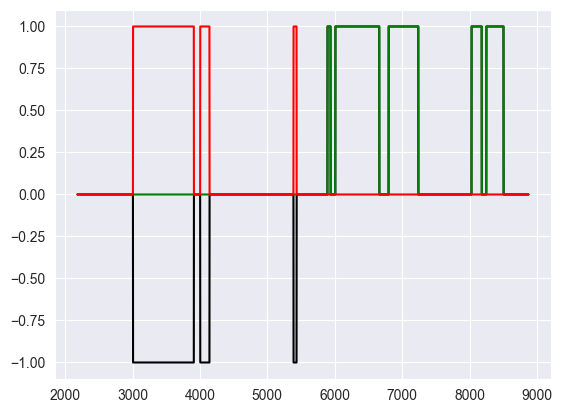

In [30]:
fig = plt.figure()
# fig.set_size_inches(10, 8)
plt.plot(df["positions"], color="black", label="positions")
plt.plot(df["is_long"], color="green", label="is_long")
plt.plot(df["is_short"], color="red", label="is_short")
plt.show()

In [31]:
df["S0_pos"] = df["S0"] * df["positions"]
df["S1_pos"] = -1.0 * df["S1"] * df["positions"]


df["value"] = df["S0_price"]*df["S0_size"]*df["positions"] + -1.0*df["S1_price"]*df["S1_size"]*df["positions"] + df["cash"]
# df["total"] = df["S1_pos"] + df["S2_pos"]

KeyError: 'S0'

In [32]:
# df["value"] = df.where(cond=df[df["is_short"] == True], other=-1.0*df["value"], axis=1)
# df.where(cond=df["is_short"] == True, other=~df["value"], axis=0, inplace=True)
# df.tail()

In [39]:
# df["is_long"] = 2*df["is_long"].astype(int) - 1
# df["is_short"] = 2*df["is_short"].astype(int) - 1
# df.head()

In [40]:
# Simple returns
df["return"] = df["value"].pct_change()
df["cumulative_return"] = df["return"].cumsum()

total_return = df["cumulative_return"].iloc[-1]
risk_free_return = 0.0

sharpe_ratio = (total_return - risk_free_return) / df["return"].std()
sharpe_ratio

nan

In [41]:
# TODO: better to use log returns before annualising.
sharpe_ratio * np.sqrt(23*252)

nan

<AxesSubplot: xlabel='datetime'>

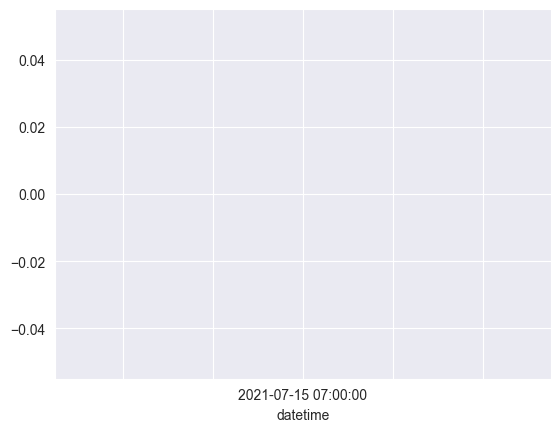

In [42]:
df["S0_size"].plot()

In [43]:
x = df["value"].astype(float)

y = x/x.shift()
y.dropna(inplace=True)

log_returns = np.log(y)

In [44]:
def sharpe_ratio_log(df, colname="total"):
    # Log returns are additive - better choice when doing *sqrt(252)
    log_returns = np.log(df[colname]/df[colname].shift())
    log_returns.fillna(0.0, inplace=True)
    log_returns.replace([np.inf, -np.inf], 0.0, inplace=True)

    sharpe = log_returns.mean()/log_returns.std()
    return sharpe


df["value"] = df["value"].astype(float)
sharpe_ratio_log(df, colname="value")

/var/folders/2v/xw5v0n3d5rlf442fyyzb04dc0000gn/T/ipykernel_1606/3505782323.py:7: RuntimeWarning: invalid value encountered in double_scalars
  sharpe = log_returns.mean()/log_returns.std()


nan

In [45]:
# Annualise: data is hourly. Futures: 23 hours in a trading day, 252 trading days in a year.
# Portfolio returns are a BM -> volatility scales with sqrt(time).
sharpe_ratio_annual = sharpe_ratio*np.sqrt(23*252)
sharpe_ratio_annual

nan

In [46]:
# Annualise: data is hourly. Futures: 23 hours in a trading day, 252 trading days in a year.
# Portfolio returns are a BM -> volatility scales with sqrt(time).
sharpe_ratio_annual = sharpe_ratio*np.sqrt(252)
sharpe_ratio_annual

nan

In [47]:
df

,S0,S1,date,Unnamed: 0,datetime_bt,spread,spread_zscore,long,short,exit_long,...,S1_size,cash,spread_mean,spread_std,value,positions,S0_pos,S1_pos,return,cumulative_return
datetime,,,,,,,,,,,,,,,,,,,,,
2021-07-15 07:00:00,71.940002,71.940002,2021-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-15 08:00:00,72.419998,72.419998,2021-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-15 09:00:00,72.589996,72.589996,2021-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-15 10:00:00,71.820000,71.820000,2021-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-15 11:00:00,71.910004,71.910004,2021-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-16 16:00:00,78.870003,78.870003,2023-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-16 17:00:00,79.029999,79.029999,2023-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-16 18:00:00,78.879997,78.879997,2023-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
